In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("./mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of observations: 8124
Number of features: 23


In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

First interesting observation: All the features are categoricals! We should pre-processed the dataset in order to create our model.

## Attribute Information

**Target class**:
* classes: edible=e, poisonous=p

**Features**
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


Since our target class is a categorical type class, we are going to use a **supervised machine learning algorithm** and more specifically a **Classification algorithm** to predict its value.

In [6]:
#Since we have only categorical data, we can change the type from object to categorical to free memory space.
df = df.select_dtypes("object").astype("category")

Number of observations for each class
e    4208
p    3916
Name: class, dtype: int64


Proportion of the observations for each class
e    51.797144
p    48.202856
Name: class, dtype: float64




[]

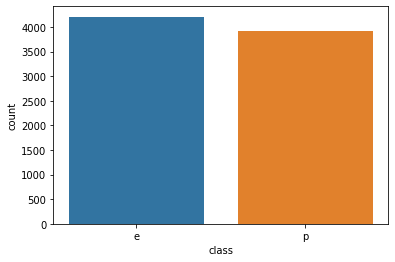

In [7]:
print(f"Number of observations for each class")
print(df["class"].value_counts())
print(f"\n")

print(f"Proportion of the observations for each class")
print(df["class"].value_counts() / len(df) * 100)
print(f"\n")

sns.countplot("class",data=df)
plt.plot()

Since the class are close to be even, a simple train test split will be enough and a stratified split won't be needed.

In [8]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


Few observations:
* There is only one type of veil-type and it covers 100% of the data. This feature might be useless for the model.
* Ring color, veil-color, gill-attachment and gill-spacing are mostly dominated by only one of their category.
* Gill-color and cap-color have the most numbers of unique values, with 12 and 10.

In [9]:
df["veil-type"].value_counts()

p    8124
Name: veil-type, dtype: int64

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values in this dataset.

**Since this dataset has only categorical data, we can't use df.corr to get the correlation between the features neither we can plot them.**

In [11]:
RANDOM_SEED = 42

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])

#If done manually.

#def encoding_target_class(x):
#    if x == "p":
#        return 1
#    return 0
# df["class"] = df["class"].apply(encoding_target_class)

The class P (poisonous) is labelled as 1 whereas the class e (edible) is labeled as 0

In [14]:
#We split the data between the features and the target class

X = df.drop(columns="class")
y = df["class"]

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size=0.3 , random_state = RANDOM_SEED)

In [16]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Since we are dealing with categorical data, it is important to transform into numerical values to be handled by our algorithm.

In [17]:
#We are using OneHotEncoder and not OrdinalEncoder due to the lack of ordination in our features.
pipeline_preprocess = Pipeline([
    ["ordinalencoder",OrdinalEncoder()]
])
#An another way to get the dummies for our categorical data would be using pandas.get_dummies

In [18]:
X_train = pipeline_preprocess.fit_transform(X_train)

In [19]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
from scipy.stats import uniform
from scipy.stats import randint as sp_randint

In [22]:
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.model_selection import StratifiedKFold

# Two ways for increasing the performance of our model: GridSearch and RandomizedSearch

But first we need to define how many features we want to use in order to get a best model with the lower number of features possible so it will be easier to implement.

Optimal number of features : 13


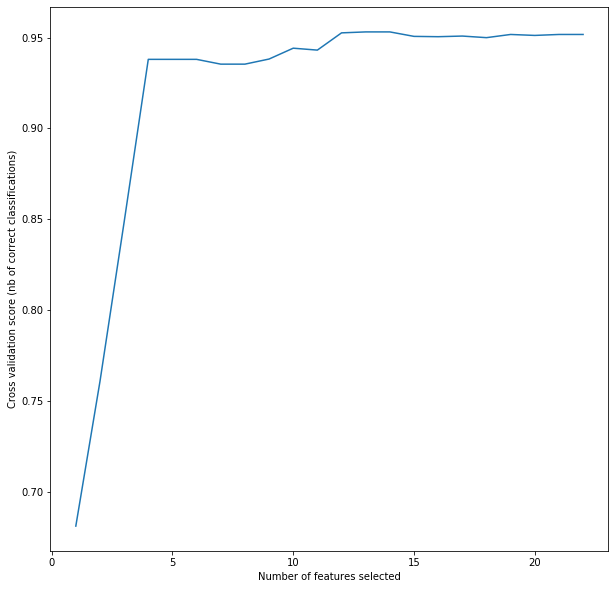

In [23]:
lr_clf = LogisticRegression(penalty="l1")

#We choose to optimize accuracy to get the best overall model in terms of performance

rfecv = RFECV(estimator=lr_clf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')

rfecv.fit(X_train,y_train)

print(f"Optimal number of features : {rfecv.n_features_}")

# Plot number of features VS. cross-validation scores


plt.figure(figsize = (10,10))

plt.xlabel("Number of features selected")

plt.ylabel("Cross validation score (nb of correct classifications)")

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Now that we now our optimal number of features, we can save those columns and re-do our train test split with only those columns.

In [24]:
col_to_keep = pd.DataFrame(sorted(zip(np.abs(rfecv.support_),X.columns),reverse=True))
col_to_keep = list(col_to_keep[col_to_keep[0] == True][1])
X_train,X_test,y_train,y_test = train_test_split(X[col_to_keep] , y, test_size=0.3 , random_state = RANDOM_SEED)

In [25]:
model = Pipeline([
        ("ordinalencoder",OrdinalEncoder()),
        ("LogisticRegression",LogisticRegression(n_jobs=-1,random_state=RANDOM_SEED))
        ])

In [26]:
#GridSearch

param_grid = [
    {'LogisticRegression__penalty' : ['l1'],
     'LogisticRegression__C':[0.001,.009,0.01,.09,1,5,10,25],
    'LogisticRegression__solver' : ['liblinear','saga']}]

grid_search = GridSearchCV(model,param_grid,cv=3,scoring="accuracy",return_train_score=True)

grid_search.fit(X_train,y_train)


print(f"Our best parameters: {grid_search.best_params_}")
print(f"Our best estimator: {grid_search.best_estimator_}")
print(f"Our best score: {grid_search.best_score_}")

Our best parameters: {'LogisticRegression__C': 10, 'LogisticRegression__penalty': 'l1', 'LogisticRegression__solver': 'liblinear'}
Our best estimator: Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('LogisticRegression',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l1',
                                    random_state=42, solver='liblinear',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
Our best score: 0.9611326064016884


In [27]:
#RandomizedSearch
#
#
#Cs = uniform(0.001, 25)
#penalty = ["l2"]
#solver = ["liblinear","saga"]
#
#random_search = {
#                'LogisticRegression__C': Cs,
#                'LogisticRegression__penalty' :penalty,
#                'LogisticRegression__solver':solver
#                }
#
#randomized_search = RandomizedSearchCV(model,random_search,cv=3,scoring="accuracy",return_train_score=True)
#
#randomized_search.fit(X_train,y_train)
#
#
#print(f"Our best parameters: {randomized_search.best_params_}")
#print(f"Our best estimator: {randomized_search.best_estimator_}")
#print(f"Our best score: {randomized_search.best_score_}")

Now that our gridsearch is over, we can save the best model for later use.

In [28]:
final_model = grid_search.best_estimator_

In [29]:
predicted_y = final_model.predict(X_test)

In [30]:
from sklearn.metrics import precision_score,\
                            recall_score,\
                            f1_score,\
                            accuracy_score,\
                            confusion_matrix,\
                            roc_curve,\
                            roc_auc_score,\
                            classification_report

In [31]:
from scikitplot.metrics import plot_confusion_matrix,\
                               plot_precision_recall,\
                               plot_roc_curve

In [32]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,linewidth = 2,label=label)
    plt.plot([0,1],[0,1],"k--") #Dashed diagonal
    plt.ylabel("True Positive Rate (FPR) / Recall / Sensitivity")
    plt.xlabel("True Negative Rate (FPR) /1- Specificity")
    plt.legend()

In [33]:
def print_metrics(predicted_y,y_test):
    
    fpr , tpr, thresholds = roc_curve(predicted_y,y_test)
    
    plot_roc_curve(fpr , tpr)
    plt.show()
    
    print(f"The area under the roc curve is {roc_auc_score(predicted_y,y_test)}")
    
   
    print("\n")
    print(f"Accuracy Score : {(accuracy_score(predicted_y,y_test))}")
    print(f"Precision Score : {(precision_score(predicted_y,y_test))}")
    print(f"Recall Score : {(recall_score(predicted_y,y_test))}")
    print(f"F1 Score : {(f1_score(predicted_y,y_test))}")
    print("\n")
    print(plot_confusion_matrix(predicted_y,y_test))
    print(f"{classification_report(predicted_y,y_test)}")

No handles with labels found to put in legend.


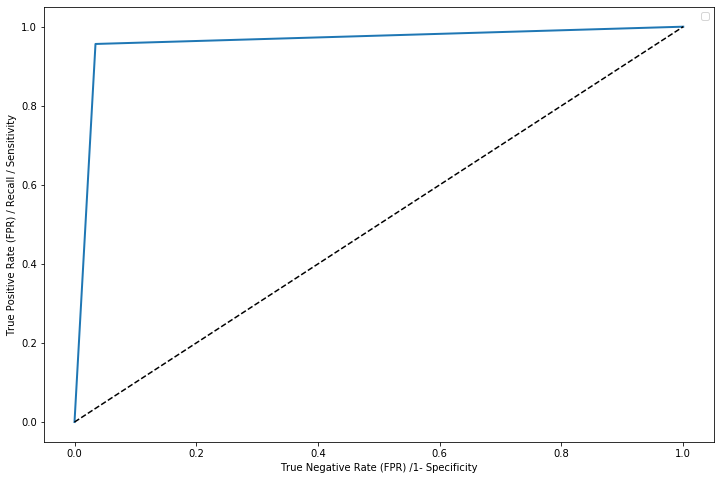

The area under the roc curve is 0.9609236964016377


Accuracy Score : 0.961033634126333
Precision Score : 0.9635901778154107
Recall Score : 0.9563025210084034
F1 Score : 0.9599325179249263


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1248
           1       0.96      0.96      0.96      1190

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



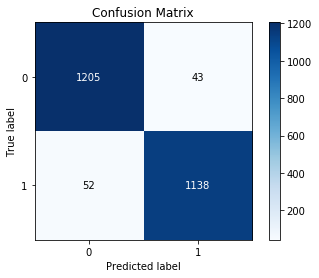

In [34]:
print_metrics(predicted_y,y_test)

Now that our last model is done, we just have to dump it into a pickle file to re-use it later!

We could also have a perfect model is we used a one hot encoder instead of a ordinal encoder but then we wouldn't be able to perform feature selection on a sparse matrix to make the WebApp more user-friendly!

In [35]:
import pickle

In [36]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

Now that we have our 13 columns, we can keep the unique values of each features for the WebApp.

In [37]:
unique = {}

unique["data"] = []

for col in set(X[col_to_keep]):
    unique["data"].append(
       {col : [str(x) for x in (list(np.unique(X[col])))]})

In [38]:
import json

In [39]:
with open("unique_values.json","w") as output_file:
    json.dump(unique,output_file)

In [40]:
col_names = ["name","prediction",'veil-color',
            'stalk-surface-above-ring','stalk-root',
            'stalk-color-above-ring','spore-print-color',
            'ring-type','ring-number','population',
            'odor','gill-spacing','gill-size',
            'gill-attachment','cap-surface']

df_json = pd.DataFrame(columns=col_names)
df_json.to_json("./df_json_file.json")

In [41]:
pd.read_json("./df_json_file.json")

,name,prediction,veil-color,stalk-surface-above-ring,stalk-root,stalk-color-above-ring,spore-print-color,ring-type,ring-number,population,odor,gill-spacing,gill-size,gill-attachment,cap-surface
